In [98]:
import pandas as pd
import numpy as np

In [104]:
data = pd.read_csv(r'C:\Users\adm\Downloads\weather.csv', index_col="DATE")

In [106]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19724 entries, 1970-01-01 to 2024-01-01
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19724 non-null  object 
 1   NAME     19724 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14609 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12267 non-null  float64
 7   PRCP     19724 non-null  float64
 8   SNOW     19724 non-null  float64
 9   SNWD     19722 non-null  float64
 10  TAVG     6601 non-null   float64
 11  TMAX     19724 non-null  int64  
 12  TMIN     19724 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     10107 non-null  float64
 16  WDF5     10024 non-null  float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [108]:
## data cleaning

In [110]:
null_pct = data.apply(pd.isnull).sum()/data.shape[0]

In [112]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.512523
ACSH       0.512472
AWND       0.259329
FMTM       0.486717
PGTM       0.378067
PRCP       0.000000
SNOW       0.000000
SNWD       0.000101
TAVG       0.665332
TMAX       0.000000
TMIN       0.000000
TSUN       0.998428
WDF1       0.512726
WDF2       0.487579
WDF5       0.491787
WDFG       0.740367
WDFM       0.999949
WESD       0.692202
WSF1       0.512574
WSF2       0.487579
WSF5       0.491837
WSFG       0.621628
WSFM       0.999949
WT01       0.629994
WT02       0.934851
WT03       0.932975
WT04       0.982610
WT05       0.981545
WT06       0.990823
WT07       0.994524
WT08       0.799939
WT09       0.992902
WT11       0.999290
WT13       0.889221
WT14       0.955029
WT15       0.997871
WT16       0.666548
WT17       0.996958
WT18       0.940834
WT19       0.999949
WT21       0.999747
WT22       0.997516
WV01       0.999949
dtype: float64

In [114]:
valid_columns = data.columns[null_pct < .05]

In [116]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [118]:
weather = data[valid_columns].copy()

In [120]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2023-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1.55,0.0,0.0,54,47
2023-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,NaN,53,45
2023-12-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,NaN,47,38


In [122]:
weather.columns = weather.columns.str.lower()

In [124]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2023-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1.55,0.0,0.0,54,47
2023-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,NaN,53,45
2023-12-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,NaN,47,38


In [126]:
weather = weather.ffill()

In [128]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [130]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [132]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
       '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01'],
      dtype='object', name='DATE', length=19724)

In [134]:
weather.index = pd.to_datetime(weather.index)

In [136]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30',
               '2023-12-31', '2024-01-01'],
              dtype='datetime64[ns]', name='DATE', length=19724, freq=None)

In [142]:
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024      1
Name: count, dtype: int64

<Axes: xlabel='DATE'>

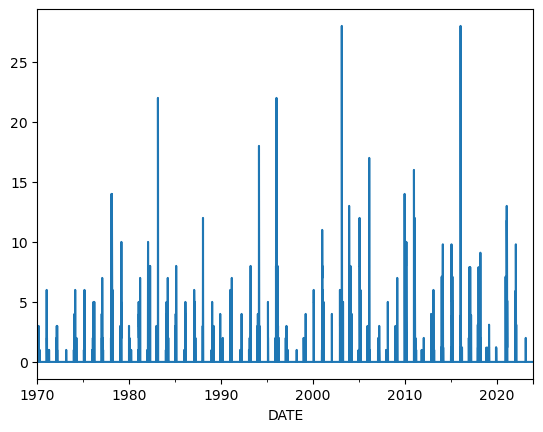

In [144]:
weather["snwd"].plot()

In [146]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2023-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1.55,0.0,0.0,54,47
2023-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,53,45
2023-12-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,38


In [148]:
weather["target"] = weather.shift(-1)["tmax"]

In [150]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2023-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1.55,0.0,0.0,54,47,53.0
2023-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,53,45,47.0
2023-12-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,38,43.0


In [152]:
weather = weather.ffill()

In [154]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2023-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1.55,0.0,0.0,54,47,53.0
2023-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,53,45,47.0
2023-12-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,38,43.0


In [180]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [182]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [184]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [186]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [188]:
predictions = backtest(weather, rr, predictors)

In [190]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2023-12-28,53.0,56.333643,3.333643
2023-12-29,47.0,56.693245,9.693245
2023-12-30,43.0,50.416184,7.416184


In [192]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])



5.1365745871524116

In [196]:
predictions["diff"].mean()

5.1365745871524116

In [198]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [200]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)


In [202]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [218]:

predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [220]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.7892082180825035

In [229]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predictions["actual"], predictions["prediction"])
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 37.55194587982756


In [233]:
mean_squared_error(predictions["actual"], predictions["prediction"])

37.55194587982756

In [235]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.369353,30.630647
2007-03-26,78.0,49.981156,28.018844
1998-03-26,80.0,52.009052,27.990948
2003-04-15,86.0,59.418323,26.581677
1985-04-18,84.0,58.463358,25.536642
...,...,...,...
2001-12-02,53.0,53.002346,0.002346
1986-08-05,82.0,82.001182,0.001182
1985-08-03,80.0,79.999022,0.000978


In [237]:
weather.loc["1990-03-07": "1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<Axes: xlabel='diff'>

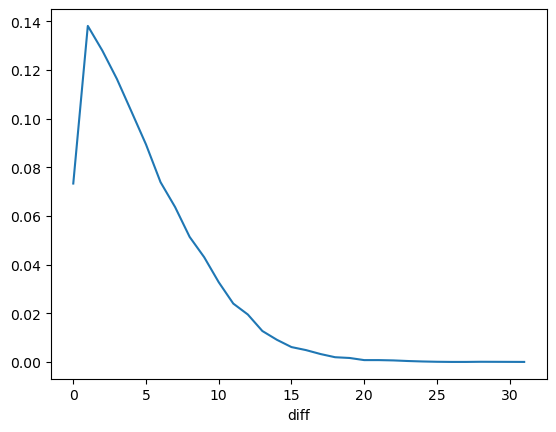

In [239]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [241]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,54.0,32.430619,21.569381
1980-01-14,51.0,44.600179,6.399821
1980-01-15,45.0,46.846655,1.846655
1980-01-16,40.0,42.211921,2.211921
1980-01-17,41.0,40.865606,0.134394
...,...,...,...
2023-12-28,53.0,51.769229,1.230771
2023-12-29,47.0,49.940108,2.940108
2023-12-30,43.0,45.012635,2.012635
